In [1]:

import numpy as np
import pandas as pd, datetime
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from time import time
import os
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from pandas import DataFrame
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

In [2]:
dataset = pd.read_excel("C:\\Users\\suman\\Desktop\\Assignment\\DS Assignment\\Airlines+Data.xlsx")
store = pd.read_excel('C:\\Users\\suman\\Desktop\\Assignment\\DS Assignment\\CocaCola_Sales_Rawdata.xlsx')

In [3]:
dataset

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
store

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


<AxesSubplot:>

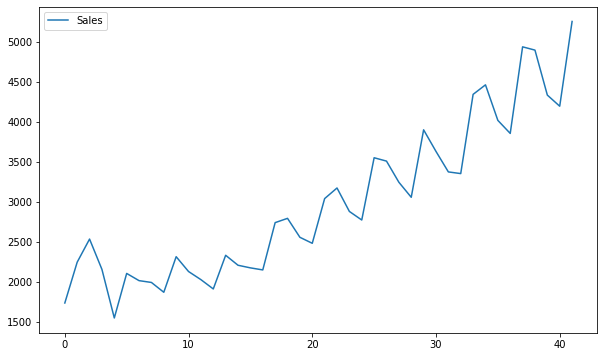

In [5]:
store.plot()

<AxesSubplot:>

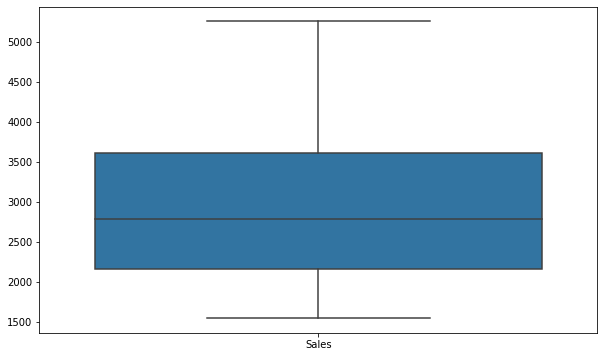

In [6]:
import seaborn as  sns
sns.boxplot(data =store)

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

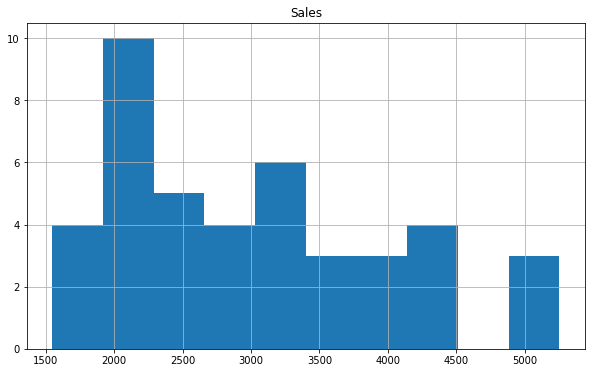

In [7]:
store.hist()

<AxesSubplot:ylabel='Density'>

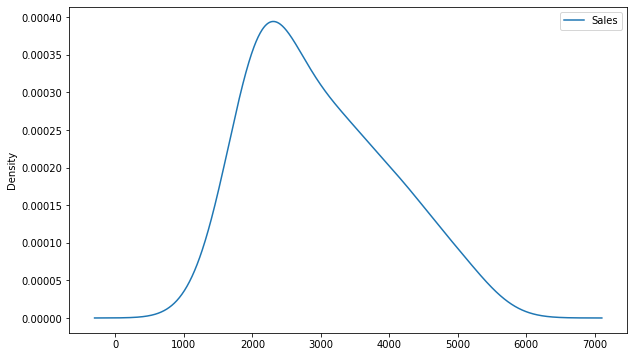

In [8]:
store.plot(kind="kde")

In [9]:
np.array(store["Sales"])

array([1734.82699966, 2244.96099854, 2533.80499268, 2154.96299744,
       1547.81899643, 2104.41199493, 2014.36299896, 1991.74699783,
       1869.04999924, 2313.63199615, 2128.31999969, 2026.82899857,
       1910.60399628, 2331.16499329, 2206.54999542, 2173.96799469,
       2148.27799988, 2739.30799866, 2792.7539978 , 2556.00999451,
       2480.97399902, 3039.522995  , 3172.11599731, 2879.00099945,
       2772.        , 3550.        , 3508.        , 3243.85999298,
       3056.        , 3899.        , 3629.        , 3373.        ,
       3352.        , 4342.        , 4461.        , 4017.        ,
       3854.        , 4936.        , 4895.        , 4333.        ,
       4194.        , 5253.        ])

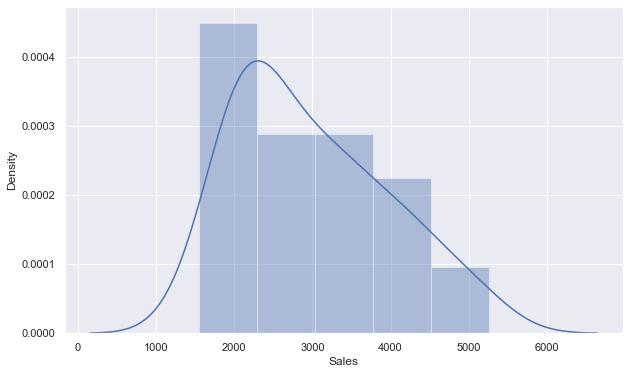

In [10]:
import seaborn as sns
sns.set_theme()
rk= sns.distplot(store['Sales'],kde=True)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

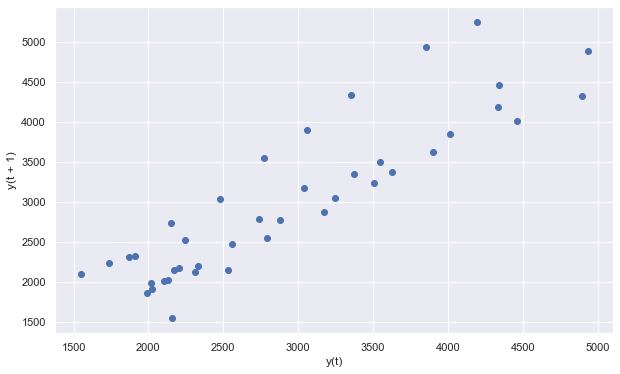

In [11]:
from pandas.plotting import lag_plot
lag_plot(store['Sales'])

In [12]:
store.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [13]:
len(store)

42

In [14]:
store['quarter'] = 0
for i in range(42):
    p=store['Quarter'][i]
    store['quarter'][i]=p[0:2]

In [15]:
store

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [16]:
store['quarter'].value_counts()

Q1    11
Q2    11
Q3    10
Q4    10
Name: quarter, dtype: int64

In [17]:
store_dummies=pd.DataFrame(pd.get_dummies(store['quarter']),columns=['Q1','Q2','Q3','Q4'])
cc=pd.concat([store,store_dummies],axis= 1)

In [18]:
store.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [19]:
cc

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [20]:
cc['t'] = np.arange(1,43)
cc['t_squared'] = cc['t']**2
cc["Sales_log"] =np.log(store['Sales'])

In [21]:
cc.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [22]:
train =cc.head(32)
test =cc.tail(10)

<AxesSubplot:>

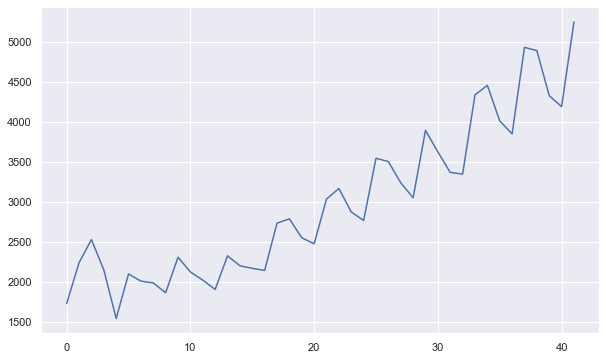

In [23]:
store['Sales'].plot()

In [24]:
import statsmodels.formula.api as smf
linear_model =smf.ols("Sales~t",data =train).fit()
linear_pred = pd.Series(linear_model.predict(test['t']))
linear_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(linear_pred)))
linear_rmse

752.9233932767132

In [25]:
quad_model =smf.ols("Sales~t+t_squared",data=train).fit()
quad_pred = pd.Series(quad_model.predict(test[['t','t_squared']]))
quad_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(quad_pred)))
quad_rmse

457.7357355407399

In [26]:
exp_model  =smf.ols("Sales_log~t",data=train).fit()
exp_pred =pd.Series(exp_model.predict(test['t']))
exp_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(exp_pred)))
exp_rmse

4387.940544839098

In [27]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_quad,457.735736
0,rmse_linear,752.923393
1,rmse_exp,4387.940545


In [28]:
datacoca = pd.read_excel("C:\\Users\\suman\\Desktop\\Assignment\\DS Assignment\\CocaCola_Sales_Rawdata.xlsx",header=0,index_col=0, parse_dates=True)
datacoca.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [29]:
split_point = len(datacoca) - 7
dataset_cc, validation_cc = datacoca[0:split_point], datacoca[split_point:]
print('Dataset_cc %d, Validation_cc %d' % (len(dataset_cc), len(validation_cc)))

Dataset_cc 35, Validation_cc 7


In [30]:
dataset_cc.to_csv('dataset_cc.csv', header=False)
validation_cc.to_csv('validation_cc.csv', header=False)

In [31]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

train = read_csv('dataset_cc.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

train

0
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Q1_94    3352.000000
Q2_94    4342.000000
Q3_94    4461.000000
Name: 1, dtype: float64

In [32]:
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [33]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
>Predicted=3373.000, Expected=3352.000
>Predicted=3352.000, Expected=4342.000
>Predicted=4342.000, Expected=4461.000
RMSE: 434.401


In [34]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","RMSE_ARIMA"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,rmse])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,RMSE_ARIMA,434.400665
2,rmse_quad,457.735736
0,rmse_linear,752.923393
1,rmse_exp,4387.940545


<AxesSubplot:>

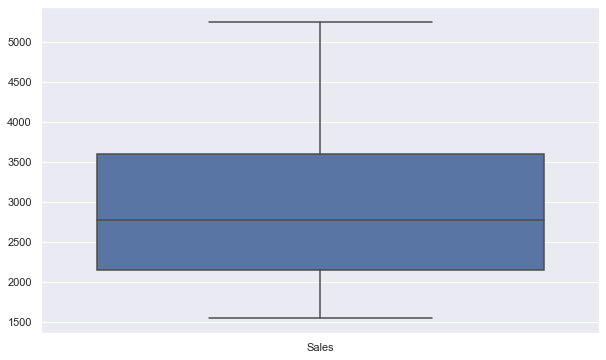

In [35]:
import seaborn as  sns
sns.boxplot(data =store)

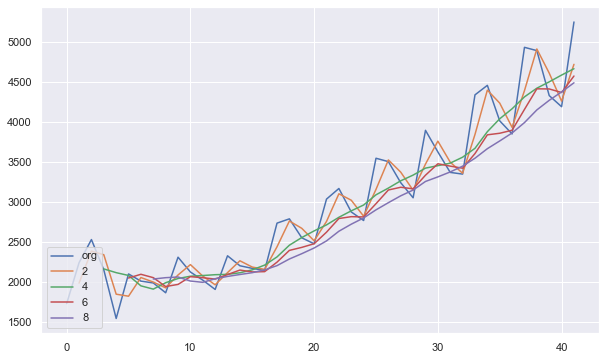

In [36]:
store.Sales.plot(label="org")
for i in range(2,10,2):
    store["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

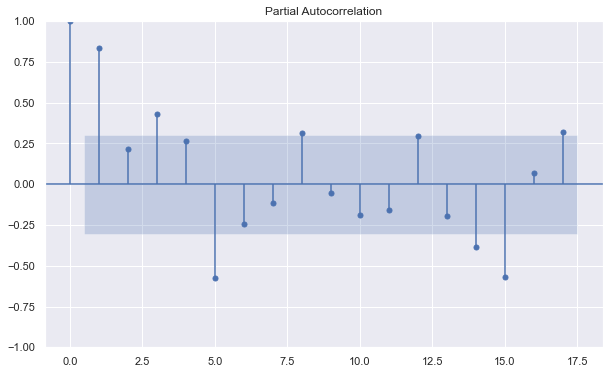

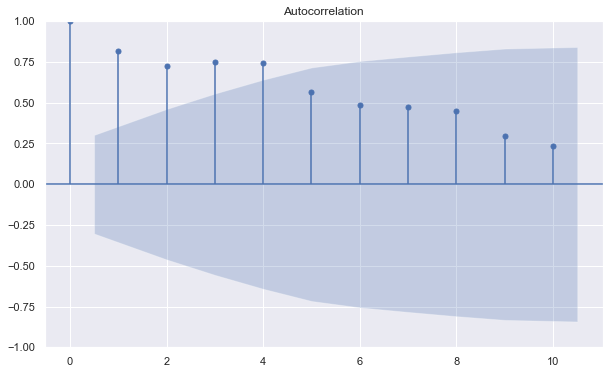

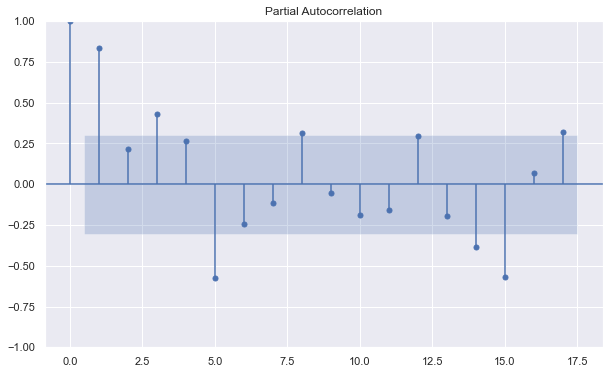

In [37]:
tsa_plots.plot_acf(store.Sales,lags=10)
tsa_plots.plot_pacf(store.Sales)

In [38]:
Train = store.head(48)
Test =store.tail(12)
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

9.681026212917576

In [39]:
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

11.02518244098768

In [40]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

3.5005791350133486

In [41]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

2.4716081752365673

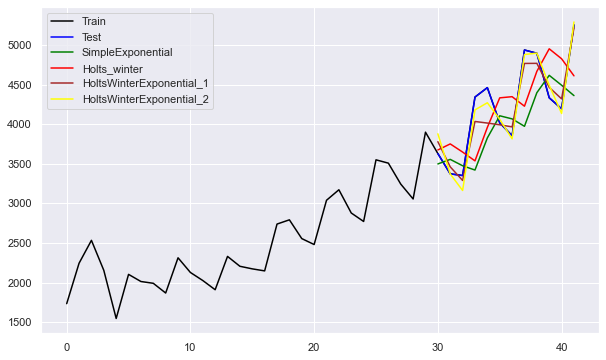

In [42]:
plt.plot(Train.index, Train["Sales"], label='Train',color="black")
plt.plot(Test.index, Test["Sales"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')

In [43]:
dataset

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [44]:
dataset.shape

(96, 2)

In [45]:
dataset['Month']=pd.to_datetime(dataset['Month'], infer_datetime_format=True)
dataset=dataset.set_index(['Month'])

In [46]:
dataset.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


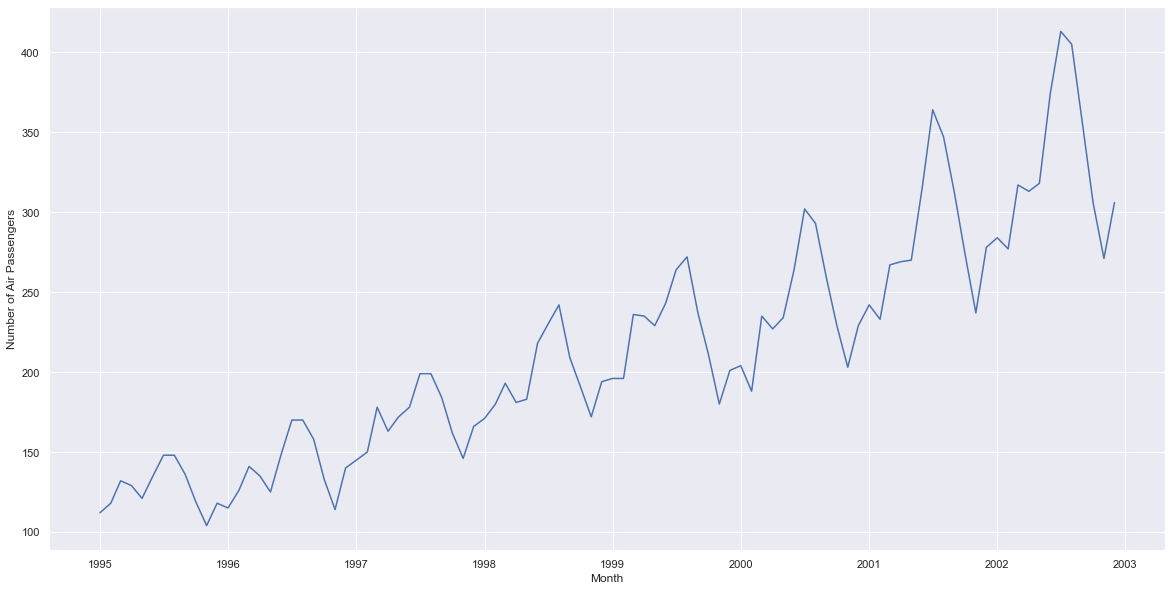

In [47]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(dataset)

In [48]:
rolmean=dataset.rolling(window=12).mean()
rolstd=dataset.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
1995-06-01         NaN
1995-07-01         NaN
1995-08-01         NaN
1995-09-01         NaN
1995-10-01         NaN
1995-11-01         NaN
1995-12-01  126.666667
1996-01-01  126.916667
1996-02-01  127.583333
1996-03-01  128.333333
            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
1995-06-01         NaN
1995-07-01         NaN
1995-08-01         NaN
1995-09-01         NaN
1995-10-01         NaN
1995-11-01         NaN
1995-12-01   13.720147
1996-01-01   13.453342
1996-02-01   13.166475
1996-03-01   13.686977


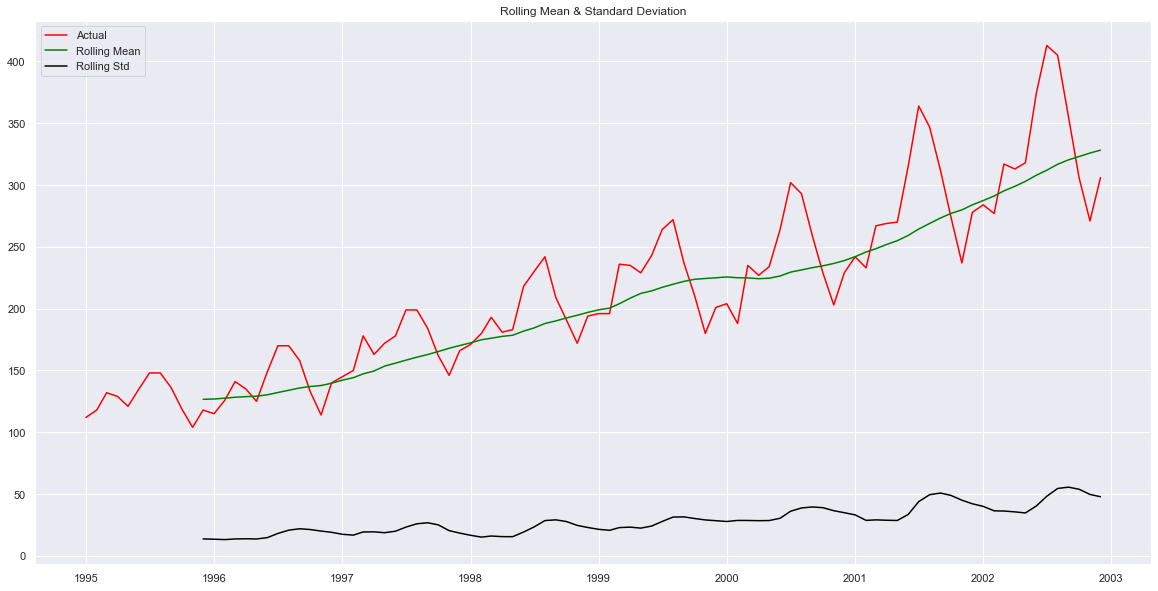

In [49]:
plt.figure(figsize=(20,10))
actual=plt.plot(dataset, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [50]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(dataset['Passengers'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           1.340248
p-value                  0.996825
Lags Used               12.000000
No. of Obs              83.000000
Critical Value (1%)     -3.511712
Critical Value (5%)     -2.897048
Critical Value (10%)    -2.585713
dtype: float64


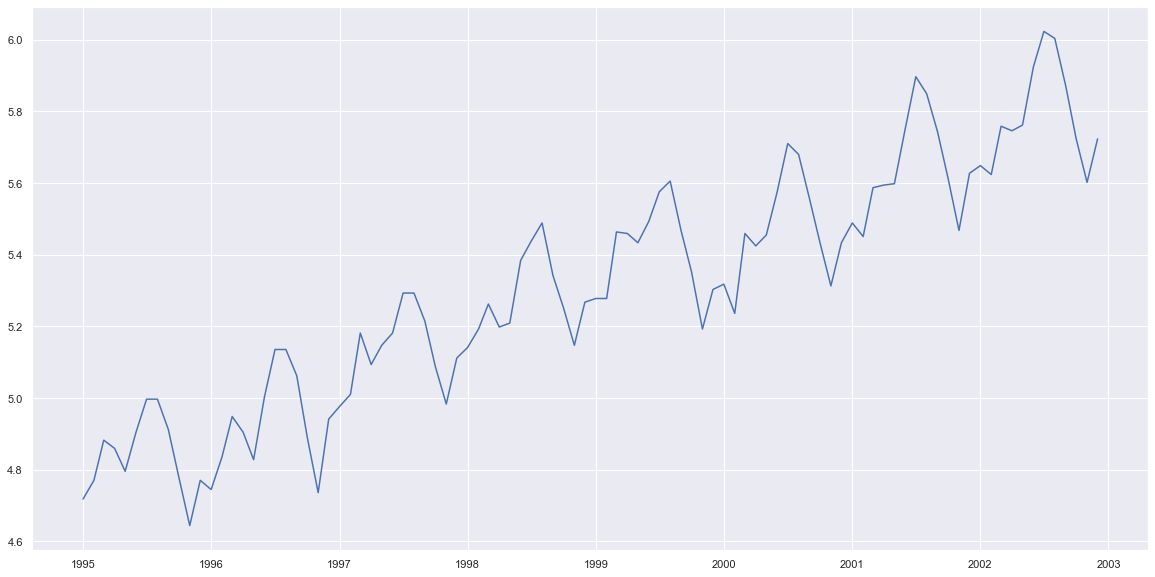

In [51]:
plt.figure(figsize=(20,10))
data_log=np.log(dataset)
plt.plot(data_log)

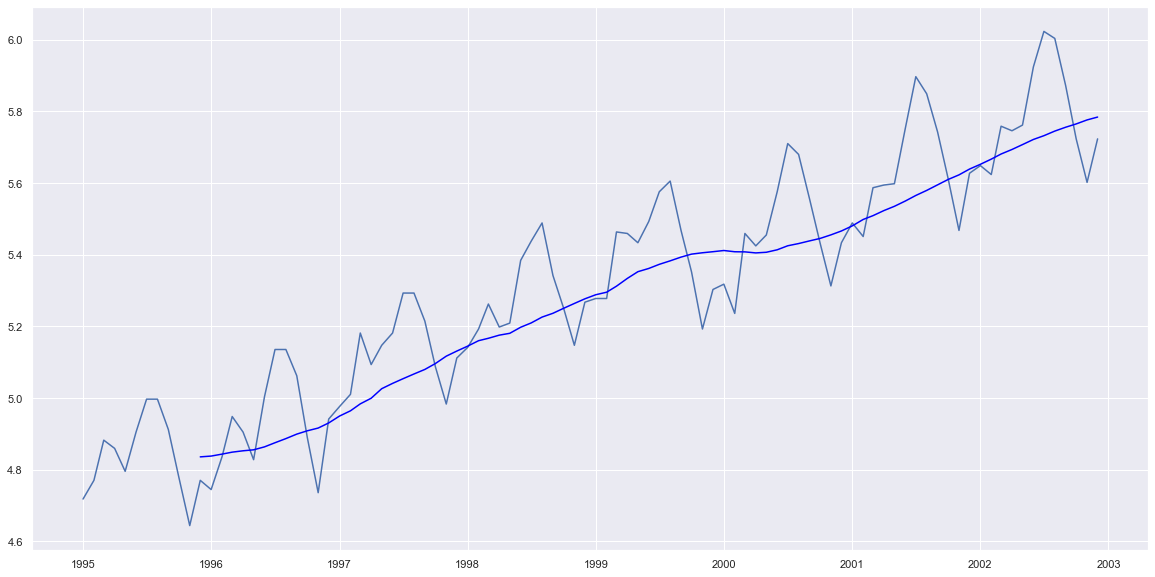

In [52]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

In [53]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

,Passengers
Month,
1995-01-01,NaN
1995-02-01,NaN
1995-03-01,NaN
1995-04-01,NaN
1995-05-01,NaN
1995-06-01,NaN
1995-07-01,NaN
1995-08-01,NaN
1995-09-01,NaN


In [54]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,Passengers
Month,
1995-12-01,-0.065494
1996-01-01,-0.093449
1996-02-01,-0.007566
1996-03-01,0.099416
1996-04-01,0.052142


In [55]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


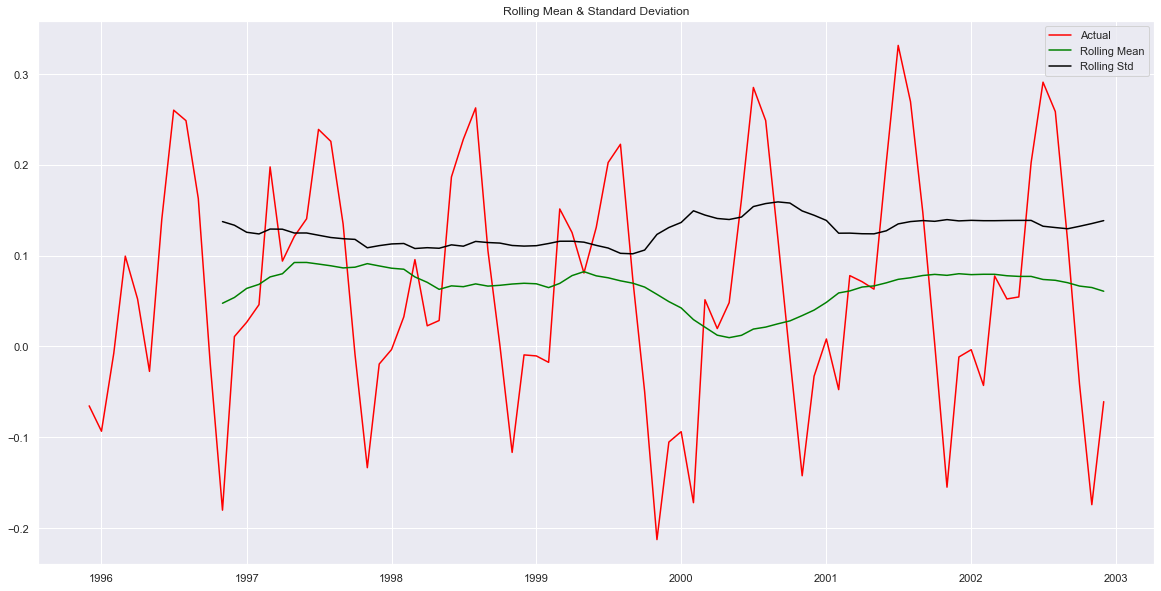

Dickey-Fuller Test: 
Test Statistic          -1.910930
p-value                  0.326937
Lags Used               12.000000
No. of Obs              72.000000
Critical Value (1%)     -3.524624
Critical Value (5%)     -2.902607
Critical Value (10%)    -2.588679
dtype: float64


In [56]:
stationarity(data_log_diff)

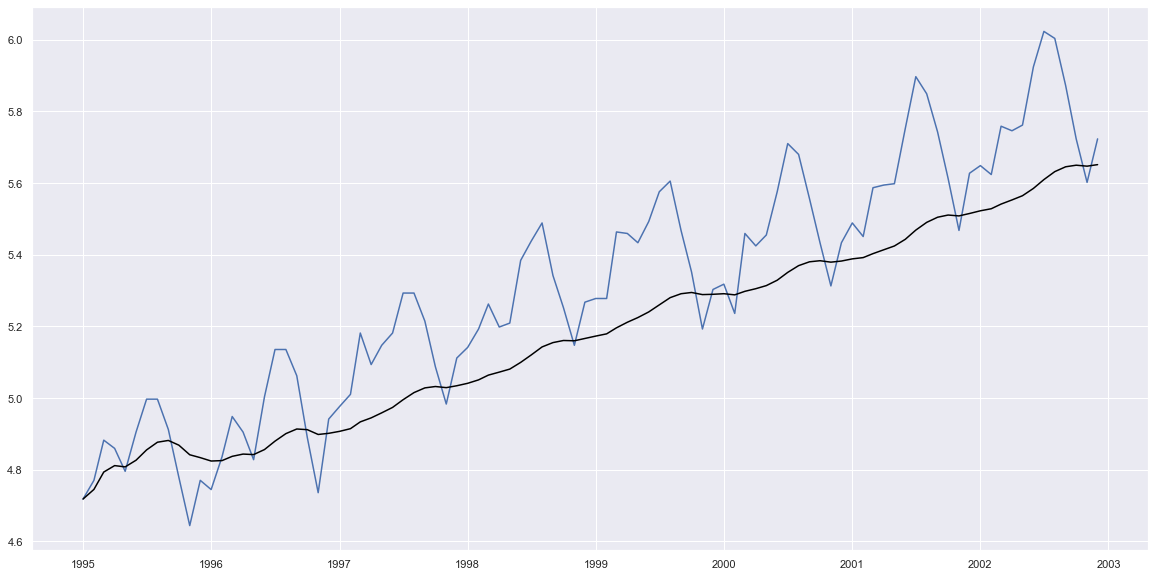

In [57]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')

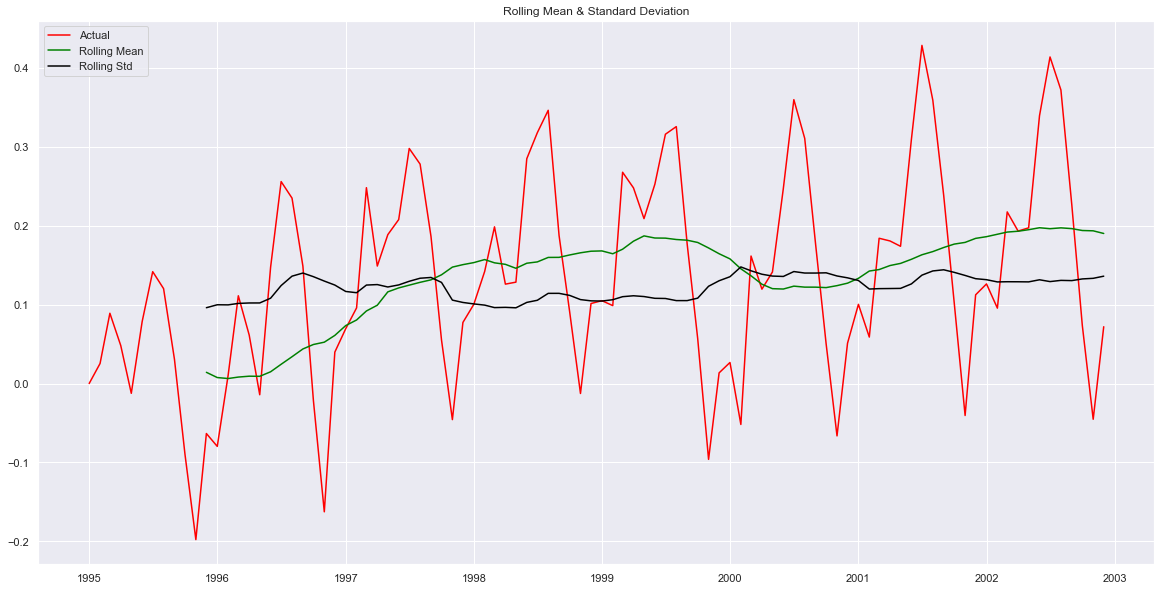

Dickey-Fuller Test: 
Test Statistic          -2.835036
p-value                  0.053441
Lags Used               12.000000
No. of Obs              83.000000
Critical Value (1%)     -3.511712
Critical Value (5%)     -2.897048
Critical Value (10%)    -2.585713
dtype: float64


In [58]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

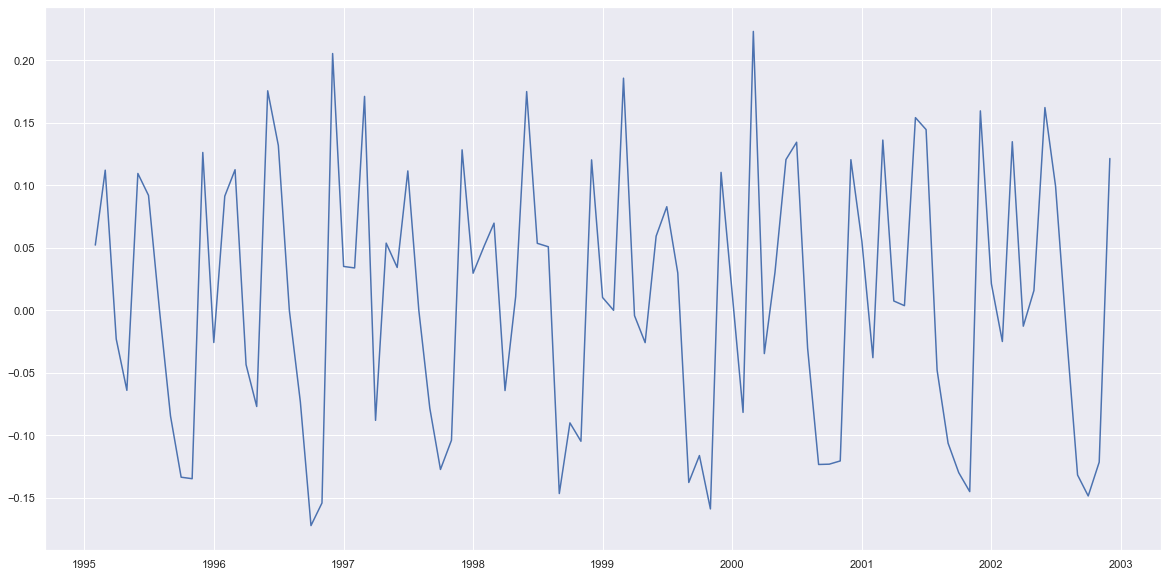

In [59]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

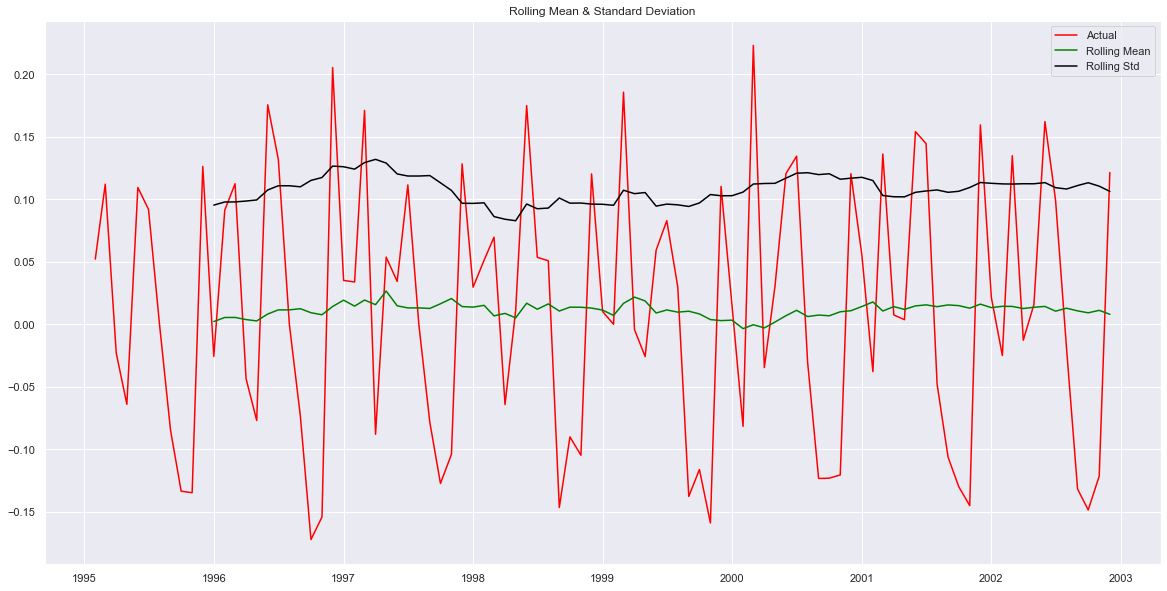

Dickey-Fuller Test: 
Test Statistic          -2.670823
p-value                  0.079225
Lags Used               12.000000
No. of Obs              82.000000
Critical Value (1%)     -3.512738
Critical Value (5%)     -2.897490
Critical Value (10%)    -2.585949
dtype: float64


In [60]:
data_shift=data_shift.dropna()
stationarity(data_shift)

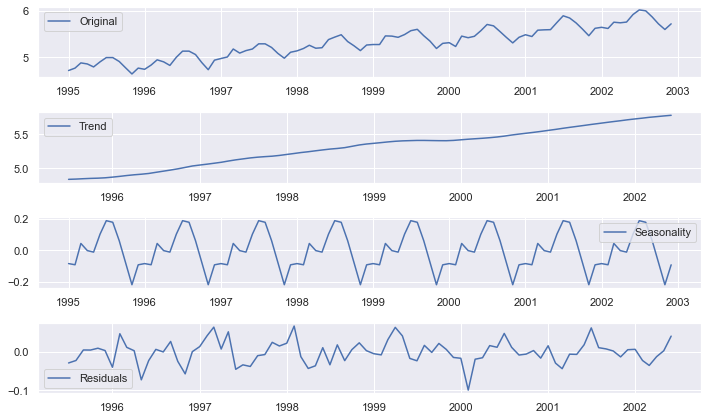

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

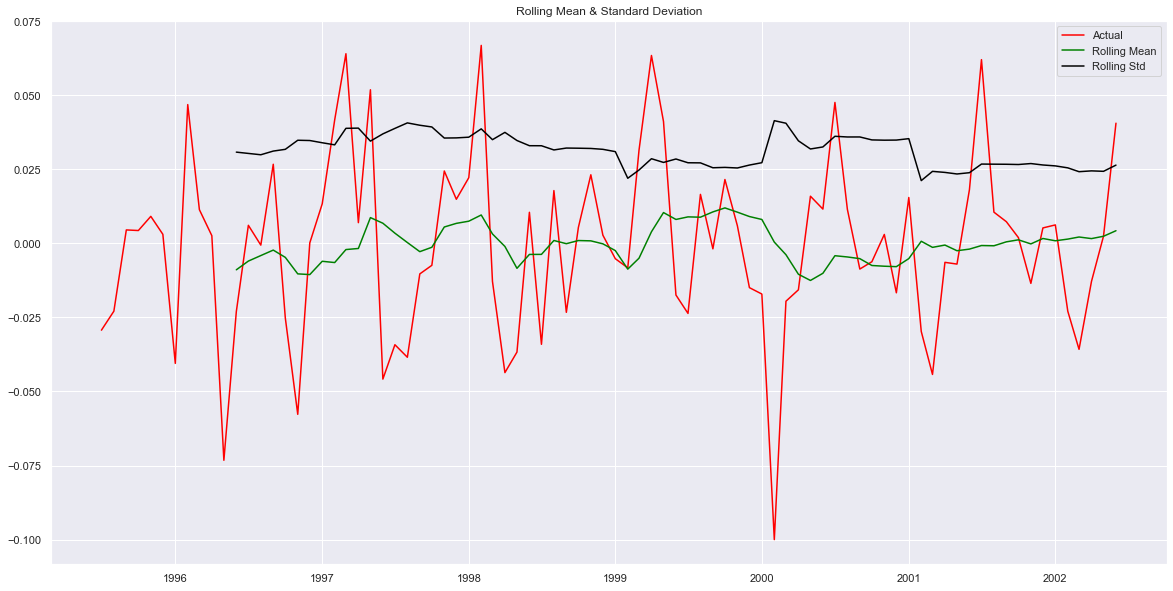

Dickey-Fuller Test: 


KeyError: 'Passengers'

In [62]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)


Text(0.5, 1.0, 'Autocorrelation Function')

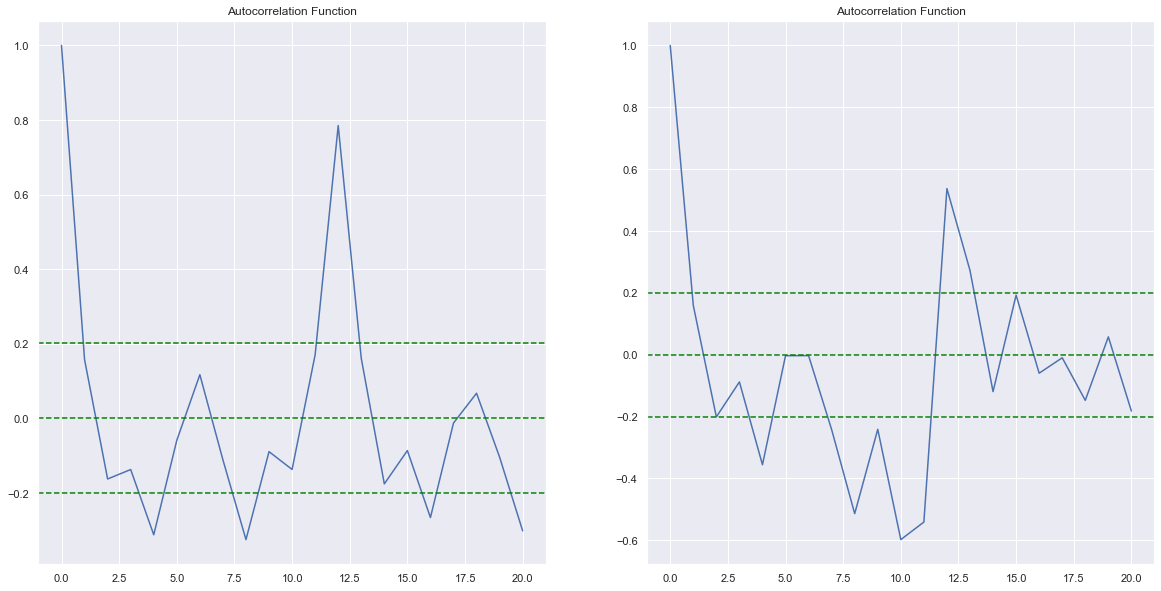

In [64]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')


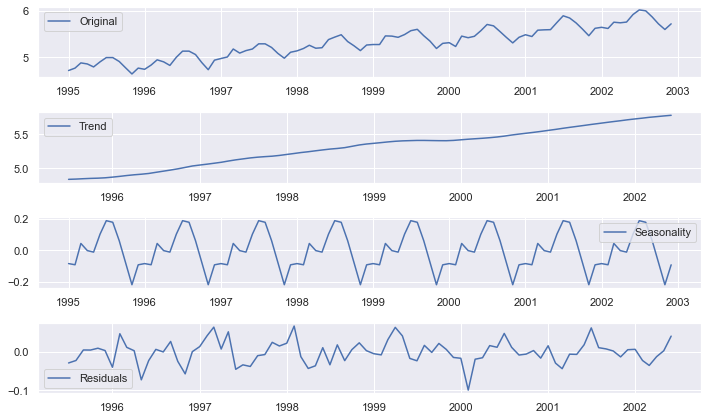

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()